Разделение датасета по аномалиям\
Нужная структура: \
**[час, день недели, месяц, температура, влажность, total_AP_max]**

Трейн на всех:
- + original 
- + original emd 
- + original multi 
- + original multi emd 
- 
- only_days 
- only_days emd
- only_days multi  
- only_days multi emd 
- 
- windows 
- windows emd
- windows multi 
- windows multi emd

Трейн на норм
- + original 
- + original emd 
- + original multi 
- + original multi emd
- 
- only_days 
- only_days emd
- only_days multi  
- only_days multi emd 
- 
- windows 
- windows emd
- windows multi 
- windows multi emd

In [2]:
import numpy as np
import pandas as pd
from datetime import datetime

import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor as LOF
from data_preparation import get_data_3 as get_data

In [3]:
# wind r'C:/Users/Lomonosova/Downloads/iqds.22.03/iqds/ds_electricity.csv'
# mac r'/Users/veronikalomonosova/Downloads/iqds/ds_electricity.csv'
path = r'/Users/veronikalomonosova/Downloads/iqds'
elec = pd.read_csv(path + '/ds_electricity.csv')


/Users/veronikalomonosova/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (9,10,11,12,13,16,24,25,26,27,28,31,39,40,41,42,43,46) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# ANOM_2
## OCSVM

In [4]:
anom = elec[elec.io_id == '5f33e3c7fb3bbc2c40fb6afe'].reset_index(drop=True)
anom.event_timestamp = pd.to_datetime(anom.event_timestamp, unit='s')
ind = 335773

before = 4
after = 7

In [5]:
anom.loc[ind - 730 * before + 10 * 3 + 6:ind + 720 * after]

,event_timestamp,io_id,Urms,Irms,P,AP_energy,RP_energy,S_energy,NP_energy,Total_P,...,S_energy_max,NP_energy_max,Total_P_max,Total_AP_energy_max,Total_RP_energy_max,Total_S_energy_max,Total_NP_energy_max,Phase_angle_max,Voltage_angle_max,Frequency_max
332889,2021-11-20 23:34:17,5f33e3c7fb3bbc2c40fb6afe,"[223.5645,224.587,224.435]","[0.2,0.2,0.25]","[5.904999999999999,7.285,14.535]","[12438.236455,17859.09444,13072.75848]",[],[],[],27.725,...,[],[],30.38,43370.08984,\N,\N,\N,"[-83.2,-80.4,-73.7]","[0,-119.9,119.8]",49.98
332890,2021-11-20 23:36:17,5f33e3c7fb3bbc2c40fb6afe,"[223.88549999999998,224.836,224.726]","[0.2,0.2,0.25]","[5.9399999999999995,7.1850000000000005,14.625]","[12438.236649999999,17859.094685,13072.7589699...",[],[],[],27.75,...,[],[],29.62,43370.09077,\N,\N,\N,"[-83.2,-80.8,-74.2]","[0,-119.9,119.8]",49.97
332891,2021-11-20 23:38:17,5f33e3c7fb3bbc2c40fb6afe,"[224.124,224.926,224.74349999999998]","[0.2,0.2,0.25]","[6.005,7.1850000000000005,14.625]","[12438.236850000001,17859.09493,13072.759445]",[],[],[],27.815,...,[],[],29.75,43370.09168,\N,\N,\N,"[-83.2,-80.8,-74.2]","[0,-119.9,119.8]",49.98
332892,2021-11-20 23:40:17,5f33e3c7fb3bbc2c40fb6afe,"[223.79399999999998,224.92399999999998,224.581...","[0.2,0.2,0.2]","[6.125,8.815000000000001,12.844999999999999]","[12438.237055000001,17859.0952,13072.759895]",[],[],[],27.785,...,[],[],30.07,43370.09262,\N,\N,\N,"[-82.7,-79,-75.8]","[0,-120,119.8]",49.99
332893,2021-11-20 23:42:17,5f33e3c7fb3bbc2c40fb6afe,"[223.8095,224.8475,224.447]","[0.2,0.2,0.2]","[6.125,9.405000000000001,12.185]","[12438.237265,17859.09551,13072.76032]",[],[],[],27.715,...,[],[],28.56,43370.09357,\N,\N,\N,"[-82.7,-79,-77.3]","[0,-120,119.7]",49.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340809,2021-12-02 00:02:47,5f33e3c7fb3bbc2c40fb6afe,"[223.582,224.957,224.515]","[1.7,1.7,1.7]","[317.19,323.375,322.565]","[13303.077594999999,18812.3277,13952.50771]",[],[],[],963.13,...,[],[],972.13,46067.92896,\N,\N,\N,"[-15.4,-16.5,-16.4]","[0,-120,119.7]",50.0
340810,2021-12-02 00:04:47,5f33e3c7fb3bbc2c40fb6afe,"[223.5485,224.9245,224.5095]","[1.7,1.75,1.7]","[316.095,322.625,321.97]","[13303.088104999999,18812.338450000003,13952.5...",[],[],[],960.69,...,[],[],973.56,46067.96102,\N,\N,\N,"[-15.4,-16.6,-16.4]","[0,-119.9,119.7]",49.98
340811,2021-12-02 00:06:47,5f33e3c7fb3bbc2c40fb6afe,"[223.6135,224.838,224.55700000000002]","[1.7,1.7,1.7]","[315.345,322.065,321.88]","[13303.09862,18812.3492,13952.529185]",[],[],[],959.29,...,[],[],970.88,46067.99299,\N,\N,\N,"[-15.5,-16.5,-16.4]","[0,-119.9,119.7]",50.0
340812,2021-12-02 00:08:47,5f33e3c7fb3bbc2c40fb6afe,"[223.60000000000002,224.6495,224.48000000000002]","[1.7,1.7,1.7]","[316.44,322.75,323.655]","[13303.10916,18812.35996,13952.539965]",[],[],[],962.845,...,[],[],972.5,46068.02518,\N,\N,\N,"[-15.5,-16.4,-16.4]","[0,-119.9,119.8]",50.0


### Оригинальные данные, одна размерность, без EMD
Трейн на всех

In [21]:
n_neigh = 5

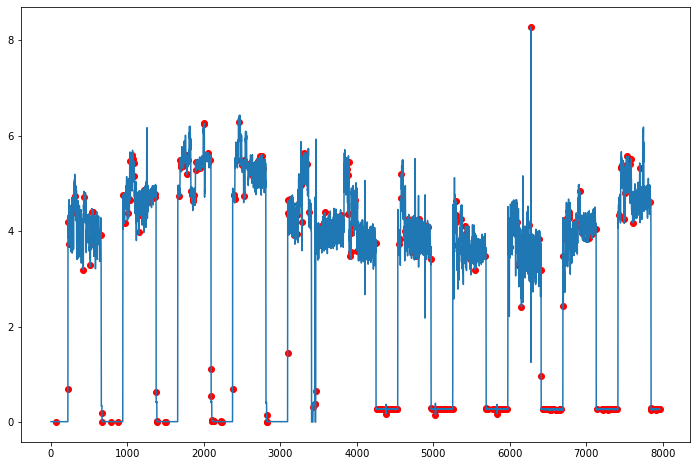

In [22]:
df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='original', emd=False, dimension='one')[1:, np.newaxis]

model = LOF(n_neighbors=n_neigh) 
preds = model.fit_predict(df)
plt.figure(figsize=(12, 8))
plt.plot(np.arange(len(df)), df)
plt.scatter(np.where(preds == -1)[0], df[np.where(preds == -1)[0]], color='red')

### Оригинальные данные, одна размерность, с EMD
Трейн на всех

766
0 766
222 657 0
1483
766 1483
940 1375 1
2201
1483 2201
1658 2095 2
2919
2201 2919
2375 2810 3
3639
2919 3639
3095 3639 4
4359
3639 4359
3639 4250 5
5078
4359 5078
4535 4969 6
5798
5078 5798
5254 5689 7
6518
5798 6518
5974 6409 8
7238
6518 7238


/Users/veronikalomonosova/Documents/GitHub/diploma/data_preparation.py:198: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()


6694 7129 9
7954
7238 7954
7414 7845 10


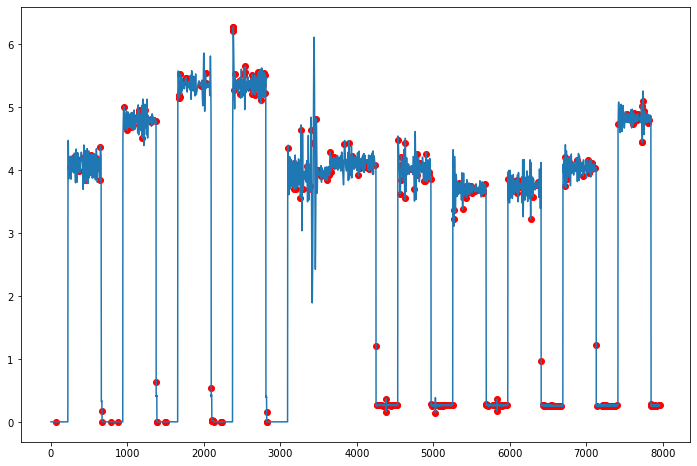

In [23]:
df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='original', emd=True, dimension='one')[1:, np.newaxis]
nu = 0.05  # theory says it should be an upper bound of the fraction of outliers
model = LOF(n_neighbors=n_neigh)  
preds = model.fit_predict(df)
plt.figure(figsize=(12, 8))
plt.plot(np.arange(len(df)), df)
plt.scatter(np.where(preds == -1)[0], df[np.where(preds == -1)[0]], color='red')

### Оригинальные данные, мульти размерность, без EMD
Трейн на всех

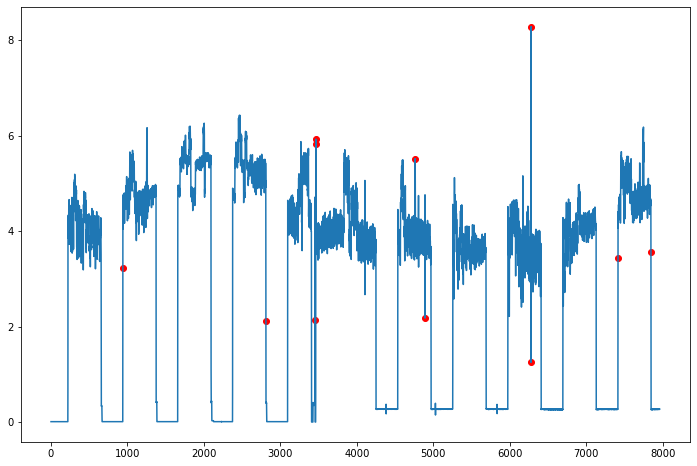

In [9]:
df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='original', emd=False, dimension='multi')[1:]
model = LOF(n_neighbors=n_neigh) 
preds = model.fit_predict(df)
plt.figure(figsize=(12, 8))
plt.plot(np.arange(len(df)), df[:, 0])
plt.scatter(np.where(preds == -1)[0], df[np.where(preds == -1)[0], 0], color='red')

### Оригинальные данные, мульти размерность, c EMD 
Трейн на всех

766
0 766
222 657 0
1483
766 1483
940 1375 1
2201
1483 2201
1658 2095 2
2919
2201 2919
2375 2810 3
3639
2919 3639
3095 3639 4
4359
3639 4359
3639 4250 5
5078
4359 5078
4535 4969 6
5798
5078 5798
5254 5689 7
6518
5798 6518
5974 6409 8
7238
6518 7238
6694 7129 9
7954
7238 7954


/Users/veronikalomonosova/Documents/GitHub/diploma/data_preparation.py:198: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()


7414 7845 10


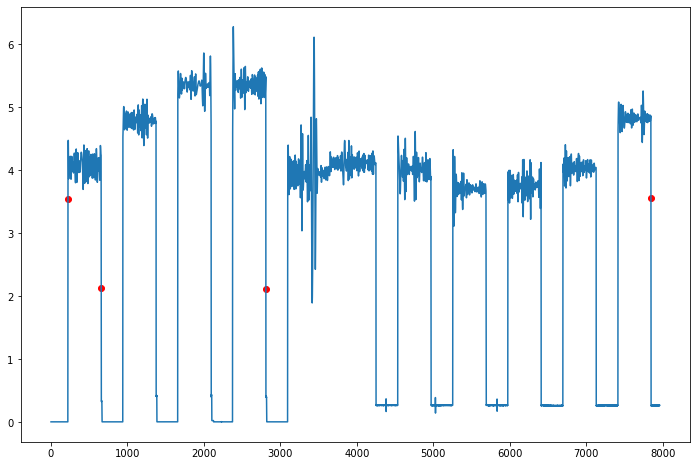

In [10]:
df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='original', emd=True, dimension='multi')[1:]
nu = 0.05  # theory says it should be an upper bound of the fraction of outliers
model = LOF(n_neighbors=n_neigh) 
preds = model.fit_predict(df)
plt.figure(figsize=(12, 8))
plt.plot(np.arange(len(df)), df[:, 0])
plt.scatter(np.where(preds == -1)[0], df[np.where(preds == -1)[0], 0], color='red')

### Суточные данные, одна размерность, без EMD 
Трейн на всех

[  48  766 1483 2201 2919 3639 4359 5078 5798 6518 7238 7954]
48 766 0
766 1483 1
1483 2201 2
2201 2919 3
2919 3639 4
3639 4359 5
4359 5078 6
5078 5798 7
5798 6518 8
6518 7238 9
7238 7954 10


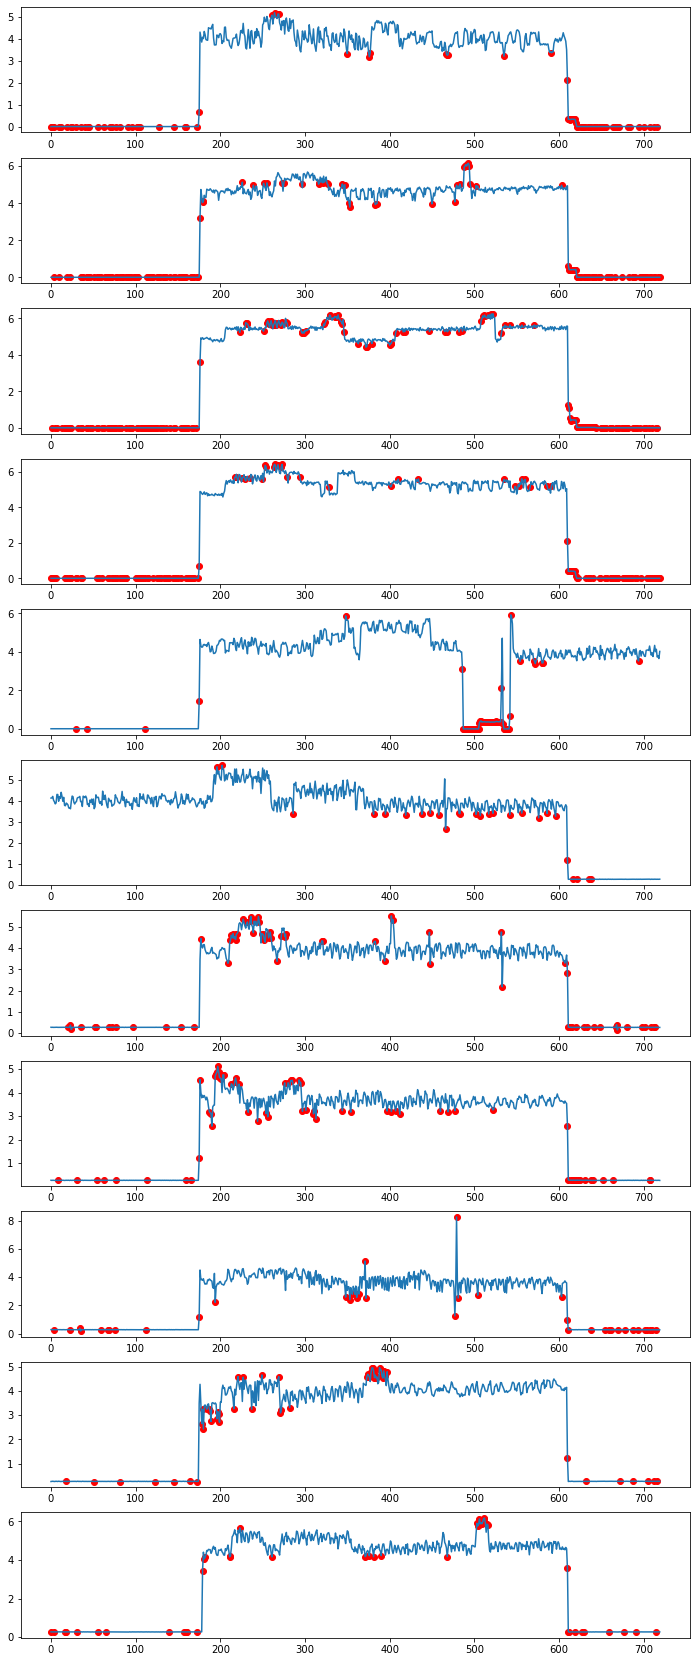

In [11]:
df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='windows', emd=False, dimension='one')
df[0][0] = 0
nu = 0.05  # theory says it should be an upper bound of the fraction of outliers
model = LOF(n_neighbors=n_neigh)  


fig, ax = plt.subplots(figsize=(12, 30), nrows=len(df), ncols=1)#(, rows=5)

i = 0
for day in df:
    preds = model.fit_predict(day[:, np.newaxis])
    ax[i].plot(np.arange(len(day)), day)
    ax[i].scatter(np.where(preds == -1)[0], day[np.where(preds == -1)[0]], color='red')
    i += 1

### Суточные данные, одна размерность, с EMD 
Трейн на всех

766
0 766
222 657 0
1483
766 1483
940 1375 1
2201
1483 2201
1658 2095 2
2919
2201 2919
2375 2810 3
3639
2919 3639
3095 3639 4
4359
3639 4359
3639 4250 5
5078
4359 5078
4535 4969 6
5798
5078 5798
5254 5689 7
6518
5798 6518
5974 6409 8
7238
6518 7238


/Users/veronikalomonosova/Documents/GitHub/diploma/data_preparation.py:198: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()


6694 7129 9
7954
7238 7954
7414 7845 10
[  48  766 1483 2201 2919 3639 4359 5078 5798 6518 7238 7954]
48 766 0
766 1483 1
1483 2201 2
2201 2919 3
2919 3639 4
3639 4359 5
4359 5078 6
5078 5798 7
5798 6518 8
6518 7238 9
7238 7954 10
(11, 720)


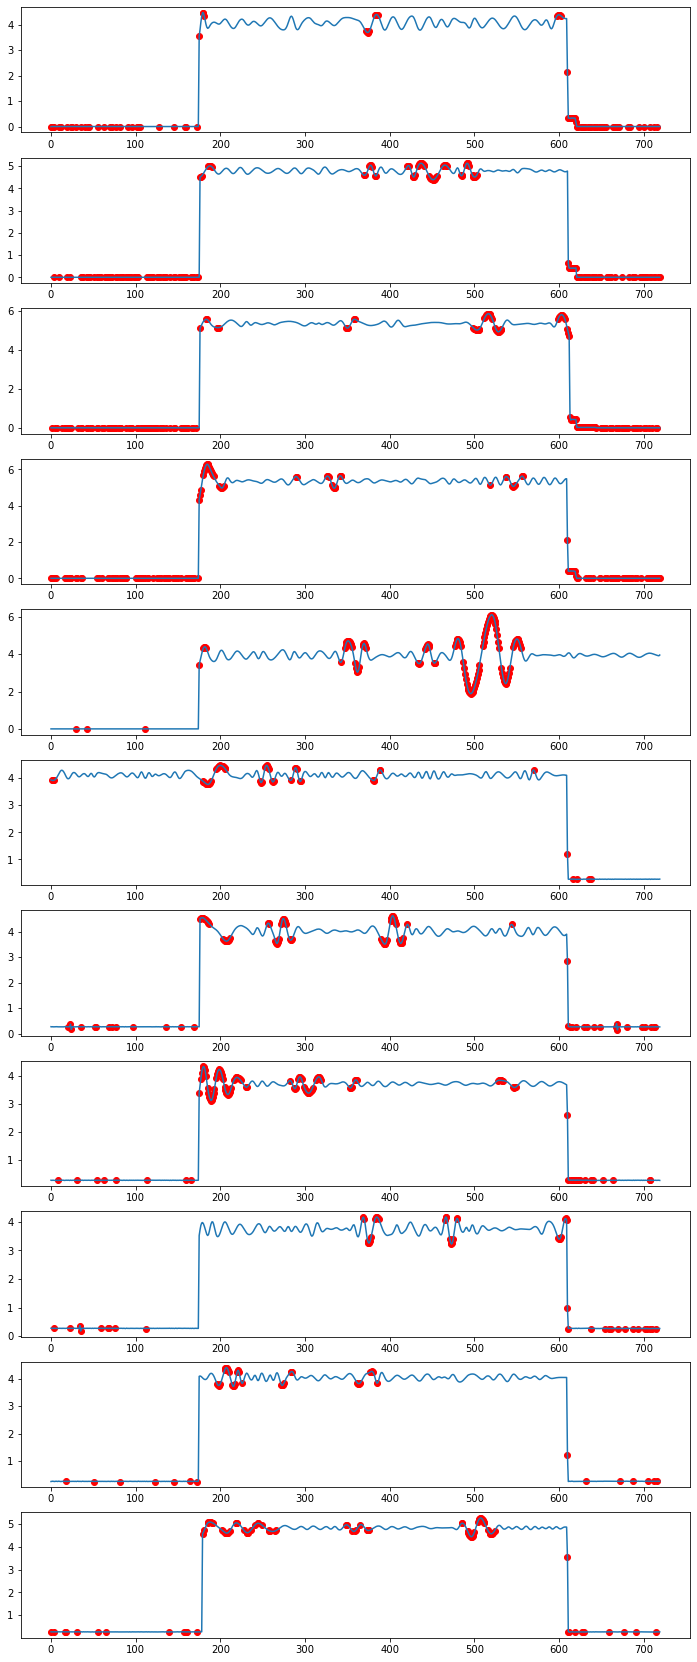

In [12]:
df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='windows', emd=True, dimension='one')
df[0][0] = 0
nu = 0.05  # theory says it should be an upper bound of the fraction of outliers
model = LOF(n_neighbors=n_neigh)  

fig, ax = plt.subplots(figsize=(12, 30), nrows=len(df), ncols=1)#(, rows=5)
print(df.shape)
i = 0
for day in df:
    preds = model.fit_predict(day[:, np.newaxis])
    ax[i].plot(np.arange(len(day)), day)
    ax[i].scatter(np.where(preds == -1)[0], day[np.where(preds == -1)[0]], color='red')
    i += 1

### Суточные данные, мульти размерность, без EMD 
Трейн на всех

(11, 720, 5)


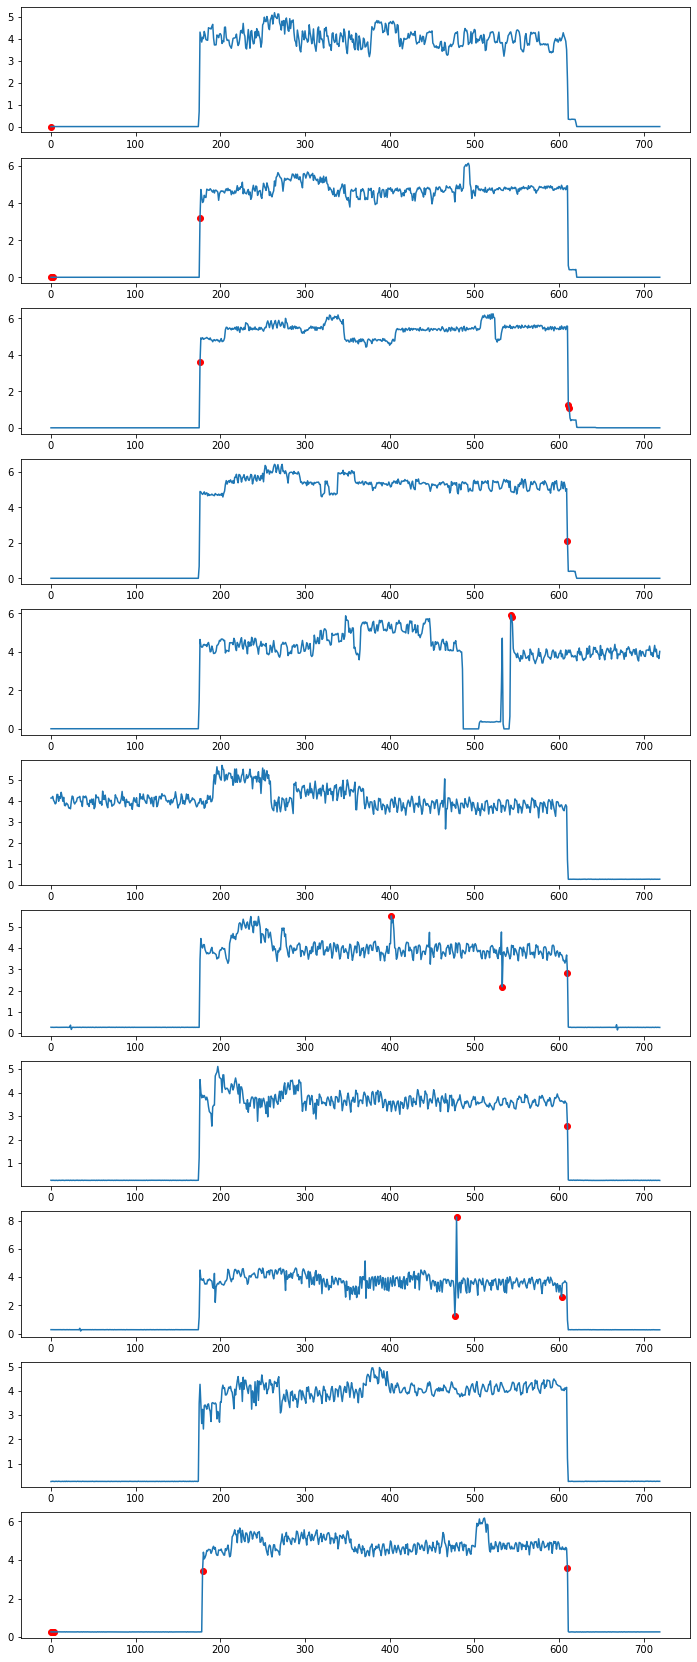

In [13]:
df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='windows', emd=False, dimension='multi')
df[0][0] = np.zeros(len(df[0][0]))
nu = 0.05  # theory says it should be an upper bound of the fraction of outliers
model = LOF(n_neighbors=n_neigh) 
fig, ax = plt.subplots(figsize=(12, 30), nrows=len(df), ncols=1)#(, rows=5)
print(df.shape)
i = 0
for day in df:
    preds = model.fit_predict(day)

    ax[i].plot(np.arange(len(day)), day[:, 0])
    ax[i].scatter(np.where(preds == -1)[0], day[np.where(preds == -1)[0]][:, 0], color='red')
    i += 1

### Суточные данные, мульти размерность, с EMD 
Трейн на всех

766
0 766
222 657 0
1483
766 1483
940 1375 1
2201
1483 2201
1658 2095 2
2919
2201 2919
2375 2810 3
3639
2919 3639
3095 3639 4
4359
3639 4359
3639 4250 5
5078
4359 5078
4535 4969 6
5798
5078 5798
5254 5689 7
6518
5798 6518
5974 6409 8
7238
6518 7238
6694 7129 9
7954
7238 7954


/Users/veronikalomonosova/Documents/GitHub/diploma/data_preparation.py:198: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()


7414 7845 10
(11, 720, 5)


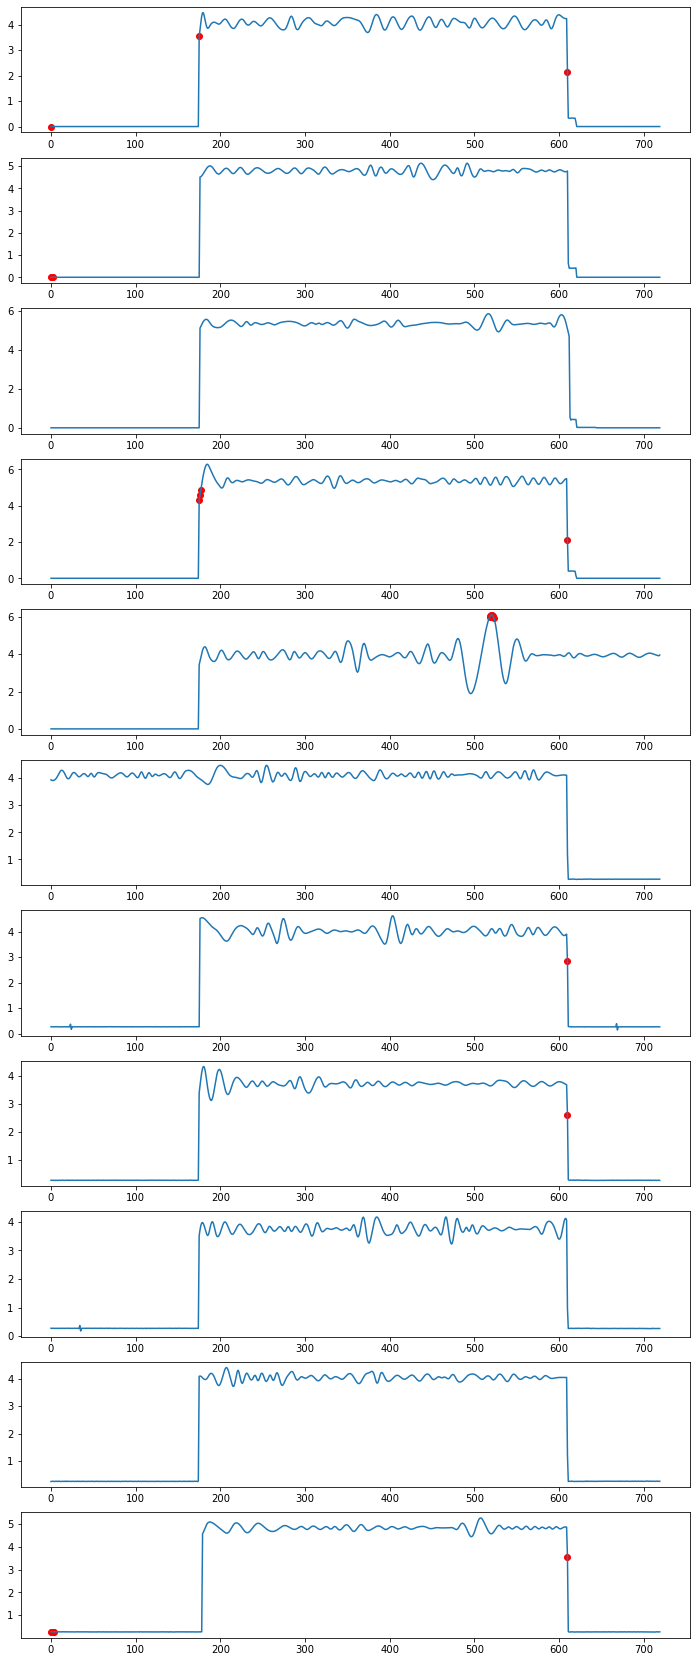

In [14]:
df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='windows', emd=True, dimension='multi')
df[0][0] = np.zeros(len(df[0][0]))

model = LOF(n_neighbors=n_neigh)  

fig, ax = plt.subplots(figsize=(12, 30), nrows=len(df), ncols=1)#(, rows=5)
print(df.shape)
i = 0
for day in df:
    preds = model.fit_predict(day)
    ax[i].plot(np.arange(len(day)), day[:, 0])
    ax[i].scatter(np.where(preds == -1)[0], day[np.where(preds == -1)[0]][:, 0], color='red')
    i += 1